# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [169]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [64]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [234]:
url = "http://api.openweathermap.org/data/2.5/weather?"
number= 0

name=[]
lat=[]
lon=[]
temp=[]
max_temp=[]
wind_spd=[]
clouds=[]
humidity=[]

for city in cities:
    query_url = url + "appid=" + weather_api_key + "&units=imperial&q=" + city

    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    number=number+1

    try:
        print(f"{number}: {weather_json['name']}")
        name.append(weather_json['name'])
        lat.append(weather_json['coord']['lat'])
        lon.append(weather_json['coord']['lon'])
        temp.append(weather_json['main']['temp'])
        max_temp.append(weather_json['main']['temp_max'])
        wind_spd.append(weather_json['wind']['speed'])
        clouds.append(weather_json['clouds']['all'])
        humidity.append(weather_json['main']['humidity'])
    except:
        print("Missing name data")
        name.append("Missing data")
        lat.append("Missing data")
        lon.append("Missing data")
        temp.append("Missing data")
        max_temp.append("Missing data")
        wind_spd.append("Missing data")
        clouds.append("Missing data")
        humidity.append("Missing data")

1: Albany
2: Mataura
3: Chokurdakh
4: Khatanga
5: Ambanja
6: Onega
Missing name data
8: Nome
9: Te Anau
10: Shenjiamen
11: Saldanha
Missing name data
13: Torbay
14: Tasiilaq
15: Luena
16: Ternate
17: Sovetskiy
18: Busselton
19: Jalu
20: Ponta do Sol
21: George Town
22: Thinadhoo
23: Rikitea
24: Saskylakh
25: Bathsheba
26: Vao
27: Ushuaia
28: Bredasdorp
Missing name data
30: Plyussa
31: Bluff
32: Nanortalik
33: Voyvozh
34: Chongwe
35: Arraial do Cabo
36: Galesong
Missing name data
38: Ngunguru
39: Bambous Virieux
40: Togur
41: Cape Town
42: Qaanaaq
43: Hobart
44: Iqaluit
Missing name data
46: Vila
47: Nouadhibou
48: Genhe
49: Tuktoyaktuk
50: Mount Gambier
51: Geraldton
52: Jamestown
53: Beringovskiy
54: Cherskiy
55: Hilo
56: Severo-Kuril'sk
57: Ürümqi
58: Vaini
Missing name data
60: Butaritari
61: Esmeraldas
62: Dikson
63: Cockburn Town
64: Changji
65: New Norfolk
66: Narsaq
67: Hermanus
68: Punta Arenas
69: Emba
70: Qaqortoq
71: Saint-François
72: Port Alfred
73: Labuhan
74: Nikolskoye

567: Semey
568: Superior
569: Quelimane
570: Vangaindrano
571: Sitka
572: Cidreira
573: Pauini
574: Viedma
575: Fukuechō
576: Mahibadhoo
577: Puerto Escondido
578: Goderich
579: Vitim
Missing name data
581: Skjervøy
582: Longyan
583: Kuah
584: Andenes
585: Anjozorobe
586: Sechura
587: San Lorenzo
588: Chinchani
589: Bagdarin
590: Rapid Valley
591: Mahon
592: Makkah al Mukarramah
593: Businga
594: Concepción del Uruguay
595: Havelock
596: Sarana
597: Luancheng
598: Al Bardīyah
599: Baharly
600: Saint-Louis
601: Sendafa
602: Porto Belo
603: Oranjemund
604: Darhan
605: Xining
606: Caniço
607: Mawlaik
608: Mazagão
609: Pozo Colorado
610: Guapí
Missing name data
612: Sola
613: Troitsko-Pechorsk
614: Ponferrada
615: Catabola
616: Soyo
617: Marsaxlokk
618: Hobyo
619: Maragogi
620: Cabedelo
621: Murray Bridge
622: Yong’an
623: Osmaniye
624: Port Hardy
625: Mandalgovi
626: Policoro
627: Cape Coast
628: Ylivieska
629: Natchitoches
630: Kozhva
631: Kalāleh
632: Yulara
633: Glossa


In [235]:
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 35.4717, 'lon': 23.7763},
 'dt': 1627973144,
 'id': 259718,
 'main': {'feels_like': 92.32,
          'grnd_level': 993,
          'humidity': 25,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 94.66,
          'temp_max': 94.66,
          'temp_min': 94.66},
 'name': 'Glossa',
 'sys': {'country': 'GR',
         'id': 6643,
         'sunrise': 1627961689,
         'sunset': 1628011636,
         'type': 1},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 45, 'gust': 23.51, 'speed': 9.78}}


  ### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [236]:
city_dict = {
    'city': name,
    'latitude':lat,
    'longitude':lon,
    'temperature':temp,
    'max temperature':max_temp,
    'wind speed':wind_spd,
    'cloudiness':clouds,
    'humidity':humidity
}

original_city_df = pd.DataFrame(city_dict)
original_city_df.head()

,city,latitude,longitude,temperature,max temperature,wind speed,cloudiness,humidity
0,Albany,42.6001,-73.9662,52.56,55.63,3.4,0,89
1,Mataura,-46.1927,168.864,37.89,37.89,1.28,7,95
2,Chokurdakh,70.6333,147.917,57.24,57.24,10.29,47,35
3,Khatanga,71.9667,102.5,81.36,81.36,13.58,100,36
4,Ambanja,-13.6833,48.45,78.73,78.73,3.27,2,59


In [264]:
city_df = original_city_df.loc[original_city_df['latitude'] != 'Missing data']
city_df.count()

city               574
latitude           574
longitude          574
temperature        574
max temperature    574
wind speed         574
cloudiness         574
humidity           574
dtype: int64

In [146]:
city_df.to_csv('../cities.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [265]:
humid = city_df.loc[city_df['humidity'] > 100]
humid.count()

city               0
latitude           0
longitude          0
temperature        0
max temperature    0
wind speed         0
cloudiness         0
humidity           0
dtype: int64

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [269]:
city_df['latitude']=city_df['latitude'].astype(float)
city_df['longitude']=city_df['longitude'].astype(float)
city_df['temperature']=city_df['temperature'].astype(float)
city_df['max temperature']=city_df['max temperature'].astype(float)
city_df['wind speed']=city_df['wind speed'].astype(float)
city_df['cloudiness']=city_df['cloudiness'].astype(float)
city_df['humidity']=city_df['humidity'].astype(float)

city_df.dtypes

<ipython-input-269-8720d668a0fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df['latitude']=city_df['latitude'].astype(float)
<ipython-input-269-8720d668a0fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df['longitude']=city_df['longitude'].astype(float)
<ipython-input-269-8720d668a0fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

city                object
latitude           float64
longitude          float64
temperature        float64
max temperature    float64
wind speed         float64
cloudiness         float64
humidity           float64
dtype: object

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [270]:
city_lat = city_df['latitude']
city_temp = city_df['temperature']
city_humidity = city_df['humidity']
city_cloud = city_df['cloudiness']
city_wind =city_df['wind speed']

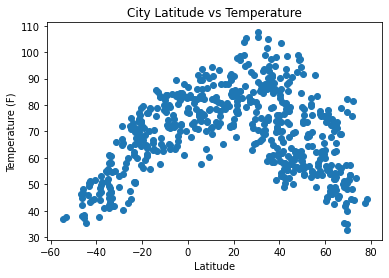

In [271]:
plt.scatter(city_lat,city_temp)

plt.title("City Latitude vs Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")

plt.savefig("latVtemp.png")
plt.show()

## Latitude vs. Humidity Plot

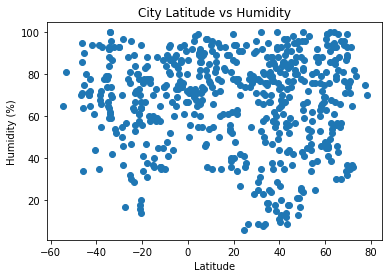

In [272]:
plt.scatter(city_lat,city_humidity)

plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

plt.savefig("latVhumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

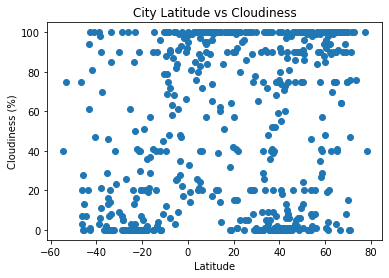

In [273]:
plt.scatter(city_lat,city_cloud)

plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

plt.savefig("latVclouds.png")
plt.show()

## Latitude vs. Wind Speed Plot

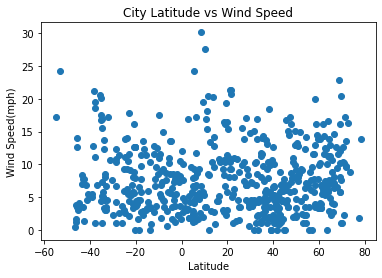

In [293]:
plt.scatter(city_lat,city_wind)

plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")

plt.savefig("charts/latVwind.png")
plt.show()

## Linear Regression

In [292]:
north = city_df.loc[city_df['latitude'] >= 0]
south = city_df.loc[city_df['latitude'] < 0]
north_lat = north['latitude']
north_temp = north['max temperature']
north_hum = north['humidity']
north_wind = north['wind speed']
north_cloud =north['cloudiness']

south_lat = south['latitude']
south_temp = south['max temperature']
south_hum = south['humidity']
south_wind = south['wind speed']
south_cloud =south['cloudiness']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.3136936587480372


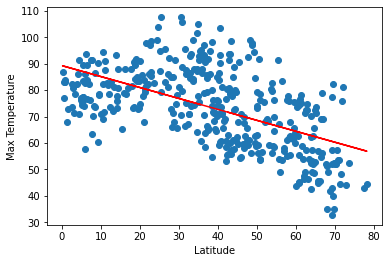

In [304]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_temp)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(north_lat, north_temp)
plt.plot(north_lat,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("charts/north_tempVlat.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6634915258576993


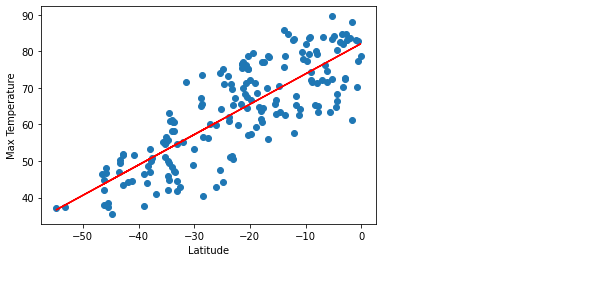

In [297]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_temp)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(south_lat, south_temp)
plt.plot(south_lat,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("charts/south_tempVlat.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0017530262670836898


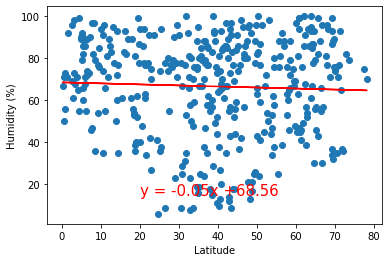

In [298]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_hum)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(north_lat, north_hum)
plt.plot(north_lat,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("charts/north_humidityVlat.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 7.742375156490977e-05


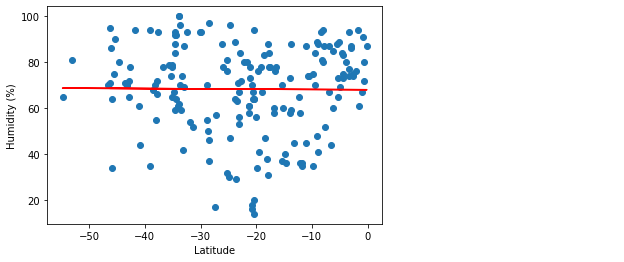

In [299]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_hum)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(south_lat, south_hum)
plt.plot(south_lat,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("charts/south_humidityVlat.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 6.0731695650174406e-05


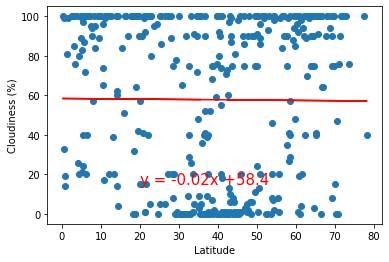

In [300]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_cloud)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(north_lat, north_cloud)
plt.plot(north_lat,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("charts/north_cloudVlat.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.09686777615993104


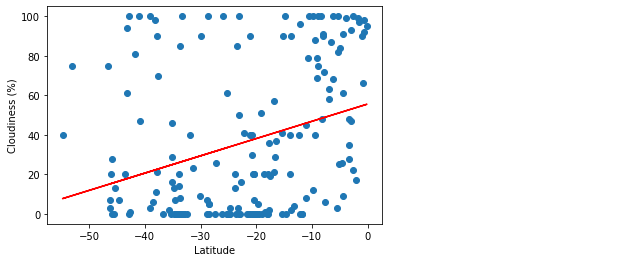

In [301]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_cloud)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(south_lat, south_cloud)
plt.plot(south_lat,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("charts/south_cloudVlat.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0002909222966386919


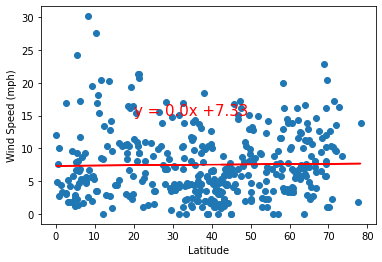

In [302]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_wind)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(north_lat, north_wind)
plt.plot(north_lat,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("charts/north_windVlat.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.024350033152939796


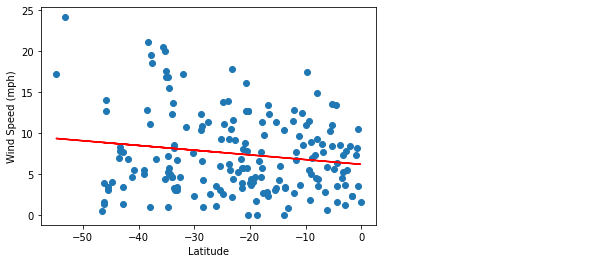

In [303]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_wind)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(south_lat, south_wind)
plt.plot(south_lat,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("charts/south_windVlat.png")
plt.show()